# Take Home 1: Conversion Rate 

## Goal: build a model that predicts conversion rate
## Goal: Based on the model, come up with ideas to improve revenue. Come up with recommendations for the product team and the marketing team to improve conversion rate

### ======
### Data:
### 1. Users who hit our site
### 2. Converted or not
### 3. characteristics: country, marketing channel, age, repert_users_yes_no, no_pages_visited (proxy for site activity / time spent on site)

In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/Users/huangz36/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
input_table_path = '/Users/huangz36/Documents/DS_Challenges/Conversion_Rate/conversion_project.csv'
df = pd.read_csv(input_table_path, header = 0)

## EDA

In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
df['source'].value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [5]:
df['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

<AxesSubplot:xlabel='total_pages_visited', ylabel='Count'>

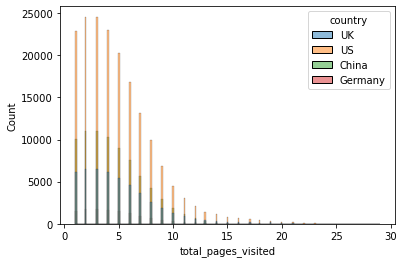

In [6]:
sns.histplot(x = "total_pages_visited", hue = "country", data = df)

<AxesSubplot:xlabel='age', ylabel='Count'>

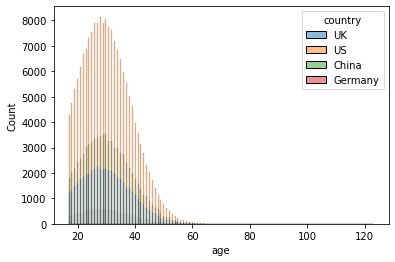

In [7]:
sns.histplot(x = "age", hue = "country", data = df)

(array([1.25006e+05, 1.35764e+05, 4.77200e+04, 7.37900e+03, 3.23000e+02,
        6.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 17. ,  27.6,  38.2,  48.8,  59.4,  70. ,  80.6,  91.2, 101.8,
        112.4, 123. ]),
 <BarContainer object of 10 artists>)

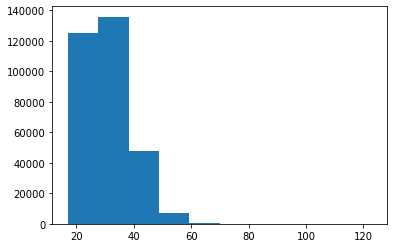

In [8]:
## Check abnormal values in age
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=10)

In [9]:
## Drop age >90
print(df.shape)
df = df[df['age']<=90]
print(df.shape)

(316200, 6)
(316198, 6)


<AxesSubplot:xlabel='age', ylabel='Count'>

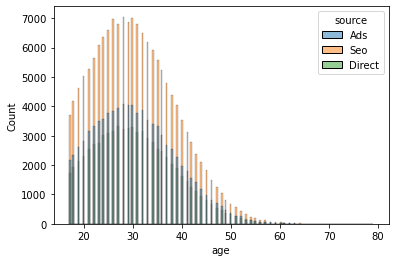

In [10]:
sns.histplot(x = "age", hue = "source", data = df)

In [11]:
df.age.describe()

count    316198.000000
mean         30.569311
std           8.268958
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='total_pages_visited', ylabel='Count'>

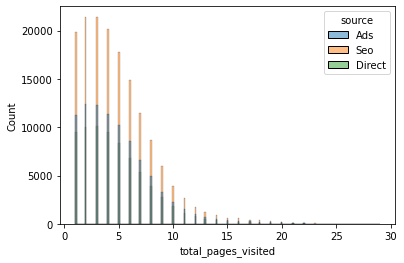

In [12]:
sns.histplot(x = "total_pages_visited", hue = "source", data = df)

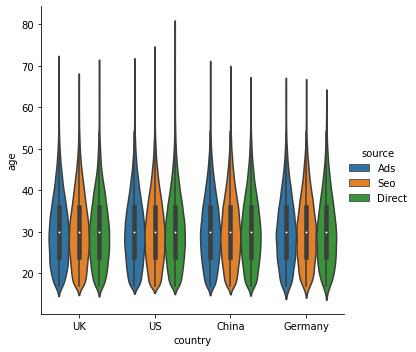

In [13]:
sns.catplot(data=df, x="country", y="age", hue="source", kind="violin")

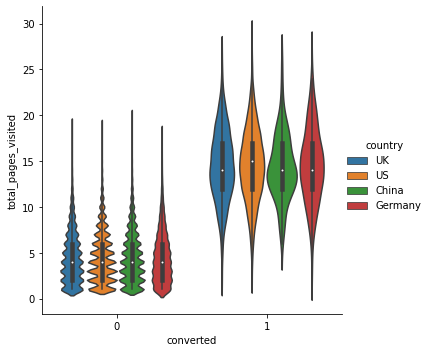

In [14]:
sns.catplot(data=df, x="converted", y="total_pages_visited", hue="country", kind="violin")

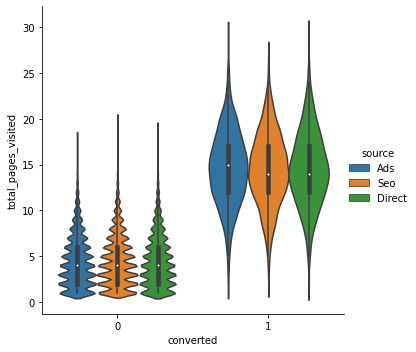

In [15]:
sns.catplot(data=df, x="converted", y="total_pages_visited", hue="source", kind="violin")

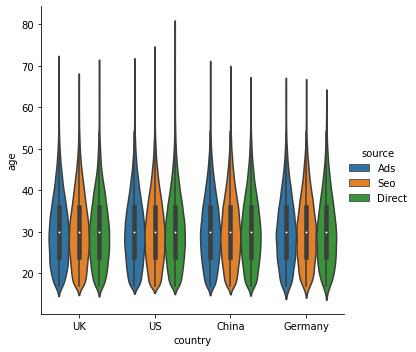

In [16]:
sns.catplot(data=df, x="country", y="age", hue="source", kind="violin")

#### Conversion rate is highly related to "total_page_visited". No clear trend in the impact of "country" or "source"

### Conversion rate exploration

In [17]:
df['converted'].value_counts()

0    306000
1     10198
Name: converted, dtype: int64

In [18]:
## Overall conversion rate
overall_conversion = df[df['converted']==1].shape[0]/df.shape[0]
print(overall_conversion)

0.03225194340255157


In [19]:
## Conversion rate by country
country_list = df['country'].unique()

print("conversion_rate\tfactor\ttotal_counts")
for country in country_list:
    country_wise_conv = round(df[(df['converted']==1) & (df['country']==country)].shape[0]/df[df['country']==country].shape[0], 4)
    print(country_wise_conv, country, df[df['country']==country].shape[0])   

conversion_rate	factor	total_counts
0.0526 UK 48449
0.0378 US 178092
0.0013 China 76602
0.0624 Germany 13055


In [20]:
## Conversion rate by new_user/existing_user
new_user_list = df['new_user'].unique()

print("conversion_rate\tfactor\ttotal_counts")
for i in new_user_list:
    factor_wise_conv = round(df[(df['converted']==1) & (df['new_user']==i)].shape[0]/df[df['new_user']==i].shape[0], 4)
    print(factor_wise_conv, i, df[df['new_user']==i].shape[0])  

conversion_rate	factor	total_counts
0.014 1 216744
0.072 0 99454


In [21]:
## Conversion rate by age
new_user_list = df['age'].unique()

for i in new_user_list:
    factor_wise_conv = round(df[(df['converted']==1) & (df['age']==i)].shape[0]/df[df['age']==i].shape[0], 4)
    print(factor_wise_conv, i, df[df['age']==i].shape[0]) 

0.0388 25 13460
0.048 23 12336
0.0326 28 14341
0.0173 39 8202
0.029 30 14346
0.0275 31 13692
0.0335 27 14084
0.0336 29 14158
0.0142 38 8970
0.0116 43 4904
0.0454 24 12960
0.0193 36 10779
0.019 37 9761
0.024 33 12631
0.0571 20 10156
0.0184 35 11471
0.0716 17 7597
0.0059 50 1356
0.0532 22 11701
0.066 18 8466
0.0216 34 12108
0.0586 19 9349
0.0132 42 5588
0.0248 32 13507
0.054 21 10966
0.0094 48 2121
0.0143 40 7148
0.0123 41 6401
0.0398 26 13931
0.0124 45 3634
0.0099 44 4224
0.0074 49 1629
0.0114 46 2994
0.0 56 286
0.0053 52 935
0.0019 54 520
0.0064 51 1093
0.008 47 2504
0.0032 53 627
0.0213 60 94
0.0 57 247
0.0076 55 394
0.0 59 127
0.0141 61 71
0.0121 58 165
0.0 62 59
0.0 65 15
0.0 63 35
0.0 66 9
0.0 67 5
0.0 64 27
0.0 68 5
0.0 69 3
0.0 70 2
0.0 73 1
0.0 77 1
0.0 72 1
0.0 79 1


In [22]:
## Conversion rate by source
new_user_list = df['source'].unique()

for i in new_user_list:
    factor_wise_conv = round(df[(df['converted']==1) & (df['source']==i)].shape[0]/df[df['source']==i].shape[0], 4)
    print(factor_wise_conv, i, df[df['source']==i].shape[0])  

0.0345 Ads 88739
0.0329 Seo 155039
0.0282 Direct 72420


### Aggregate dataframe to calculate conversion rate

In [23]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


#### Country-wise conversion rate

In [24]:
df_country_conversion = df.groupby("country").converted.agg(['sum', 'count']).reset_index()
df_country_conversion.columns = ['country', 'converted', 'total']
df_country_conversion['conversion_rate'] = df_country_conversion['converted'] / df_country_conversion['total']
df_country_conversion['conversion_rate'] = df_country_conversion['conversion_rate'].round(3)

#df_country_conversion = df_country_conversion[['country', 'conversion_rate']]

df_country_conversion

,country,converted,total,conversion_rate
0,China,102,76602,0.001
1,Germany,815,13055,0.062
2,UK,2549,48449,0.053
3,US,6732,178092,0.038


Text(0, 0.5, 'Conversion Rate')

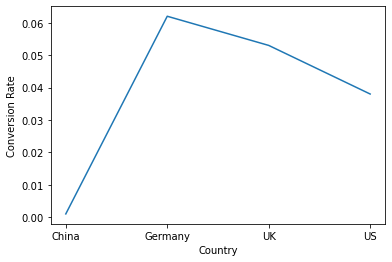

In [25]:
import matplotlib.pyplot as plt
country_conversion = plt.plot(df_country_conversion['country'], df_country_conversion['conversion_rate'])
plt.xlabel('Country')
plt.ylabel('Conversion Rate')

#### Age-wise conversion rate

In [26]:
df_conversion = df.groupby("age").converted.agg(['sum', 'count']).reset_index()
df_conversion.columns = ['age', 'converted', 'total']
df_conversion['conversion_rate'] = df_conversion['converted'] / df_conversion['total']
df_conversion['conversion_rate'] = df_conversion['conversion_rate'].round(3)
df_conversion.sort_values(by='age', ascending=True).head()

,age,converted,total,conversion_rate
0,17,544,7597,0.072
1,18,559,8466,0.066
2,19,548,9349,0.059
3,20,580,10156,0.057
4,21,592,10966,0.054


Text(0, 0.5, 'Conversion Rate')

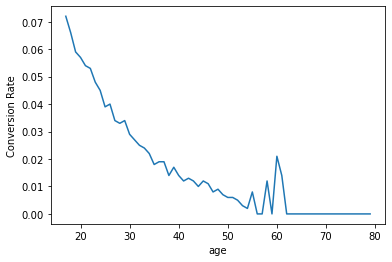

In [27]:
import matplotlib.pyplot as plt
conversion = plt.plot(df_conversion['age'], df_conversion['conversion_rate'])
plt.xlabel('age')
plt.ylabel('Conversion Rate')

#### new_user wise conversion rate

In [28]:
df_conversion = df.groupby("new_user").converted.agg(['sum', 'count']).reset_index()
df_conversion.columns = ['new_user', 'converted', 'total']
df_conversion['conversion_rate'] = df_conversion['converted'] / df_conversion['total']
df_conversion['conversion_rate'] = df_conversion['conversion_rate'].round(3)
df_conversion.sort_values(by='new_user', ascending=True).head()

,new_user,converted,total,conversion_rate
0,0,7159,99454,0.072
1,1,3039,216744,0.014


Text(0, 0.5, 'Conversion Rate')

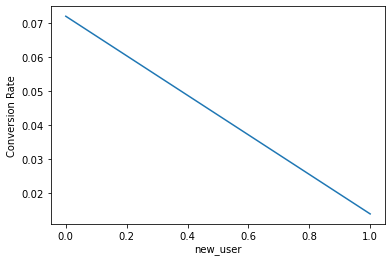

In [29]:
import matplotlib.pyplot as plt
conversion = plt.plot(df_conversion['new_user'], df_conversion['conversion_rate'])
plt.xlabel('new_user')
plt.ylabel('Conversion Rate')

#### source wise conversion rate

In [30]:
df_conversion = df.groupby("source").converted.agg(['sum', 'count']).reset_index()
df_conversion.columns = ['source', 'converted', 'total']
df_conversion['conversion_rate'] = df_conversion['converted'] / df_conversion['total']
df_conversion['conversion_rate'] = df_conversion['conversion_rate'].round(3)
df_conversion.sort_values(by='source', ascending=True).head()

,source,converted,total,conversion_rate
0,Ads,3059,88739,0.034
1,Direct,2040,72420,0.028
2,Seo,5099,155039,0.033


Text(0, 0.5, 'Conversion Rate')

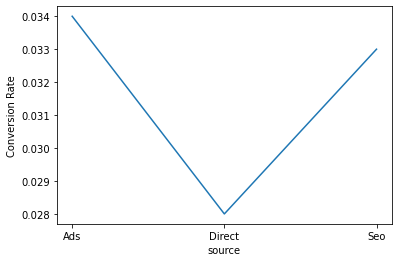

In [31]:
import matplotlib.pyplot as plt
conversion = plt.plot(df_conversion['source'], df_conversion['conversion_rate'])
plt.xlabel('source')
plt.ylabel('Conversion Rate')

In [32]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


### EDA to find which variable may have biggest impact of "converted" vs "not-converted"

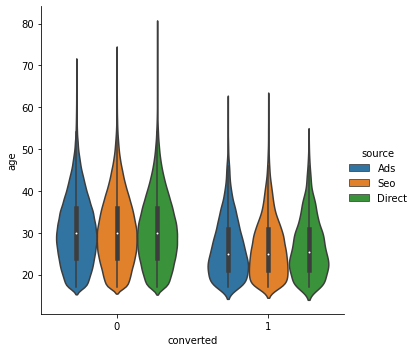

In [33]:
sns.catplot(data=df, x="converted", y="age", hue="source", kind="violin")

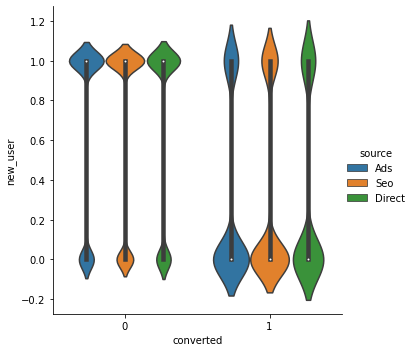

In [34]:
sns.catplot(data=df, x="converted", y="new_user", hue="source", kind="violin")

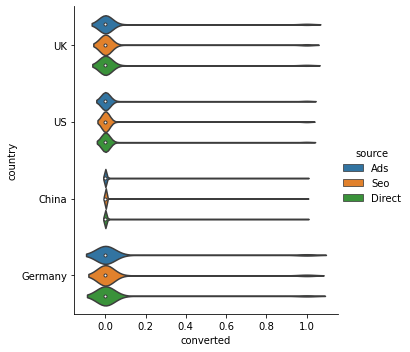

In [35]:
sns.catplot(data=df, x="converted", y="country", hue="source", kind="violin")

In [36]:
## China has the lowest conversion rate

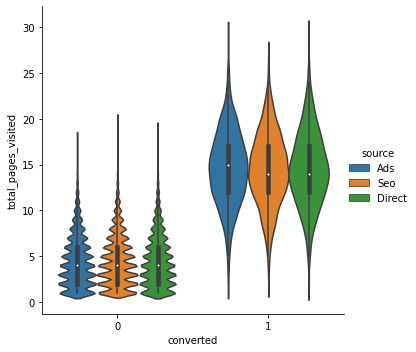

In [37]:
sns.catplot(data=df, x="converted", y="total_pages_visited", hue="source", kind="violin")

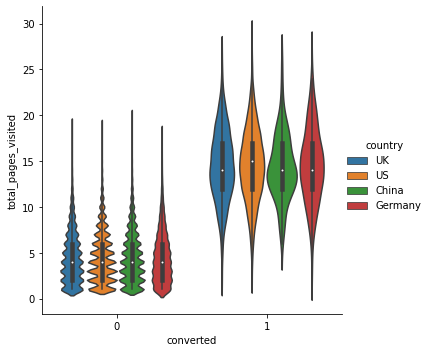

In [38]:
### Is total_pages_visited correlated with new_user? No
sns.catplot(data=df, x="converted", y="total_pages_visited", hue="country", kind="violin")

<AxesSubplot:xlabel='total_pages_visited', ylabel='Count'>

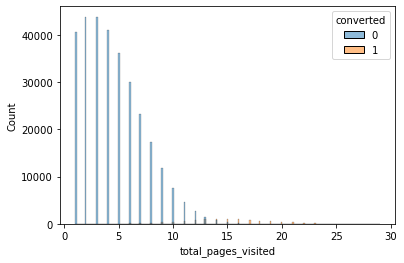

In [39]:
### Generate histogram of total_pages_visited split by "converted"
sns.histplot(data=df, x="total_pages_visited", hue="converted")

<AxesSubplot:xlabel='total_pages_visited', ylabel='Count'>

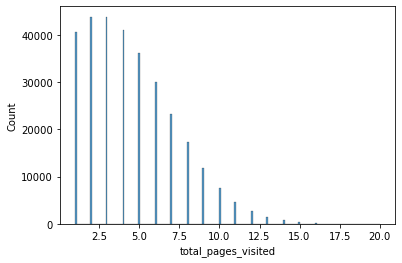

In [40]:
sns.histplot(data=df[df['converted']==0], x="total_pages_visited")

<AxesSubplot:xlabel='total_pages_visited', ylabel='Count'>

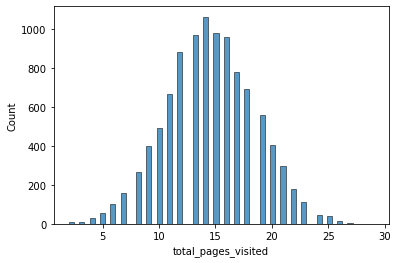

In [41]:
sns.histplot(data=df[df['converted']==1], x="total_pages_visited")

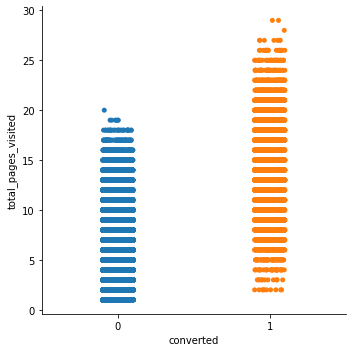

In [42]:
sns.catplot(data=df, x="converted", y="total_pages_visited")

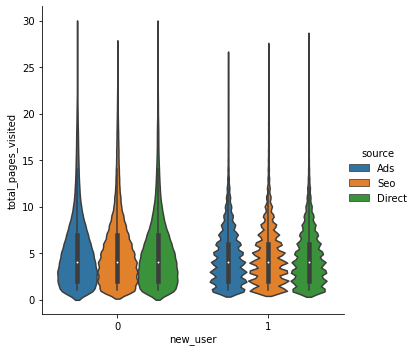

In [43]:
### Is total_pages_visited correlated with new_user? No
sns.catplot(data=df, x="new_user", y="total_pages_visited", hue="source", kind="violin")

In [44]:
df.groupby(['new_user', 'country']).count()

age  source  total_pages_visited  converted
new_user country                                                
0        China     23094   23094                23094      23094
         Germany    4213    4213                 4213       4213
         UK        15511   15511                15511      15511
         US        56636   56636                56636      56636
1        China     53508   53508                53508      53508
         Germany    8842    8842                 8842       8842
         UK        32938   32938                32938      32938
         US       121456  121456               121456     121456

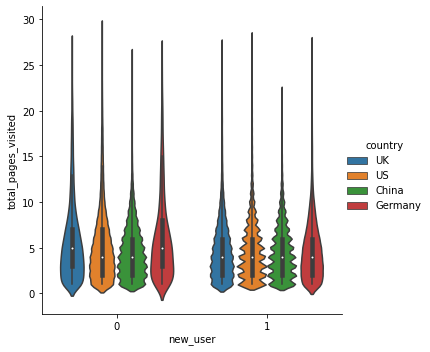

In [45]:
### Is total_pages_visited correlated with new_user? No
sns.catplot(data=df, x="new_user", y="total_pages_visited", hue="country", kind="violin")

In [46]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [47]:
### Perform a two sample t-test for total_pages_visited vs converted

from statsmodels.stats.weightstats import ttest_ind
import numpy as np
 
# Creating data groups
data_group1 = df[df['converted']==1]['total_pages_visited']
data_group2 = df[df['converted']==0]['total_pages_visited']
 
# Conducting two-sample ttest
stats.ttest_ind(data_group1, data_group2, equal_var=False)

Ttest_indResult(statistic=252.80078623298368, pvalue=0.0)

### Significant difference between converted vs non-converted for total_pages_visited

## Build prediction model

In [48]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


### Feature engineering
#### convert df['country'], df['source'] into dummy variables (one-hot-encoder)
##### https://towardsdatascience.com/one-hot-encoding-scikit-vs-pandas-2133775567b8

In [49]:
df_new = pd.get_dummies(df, columns=['country', 'source'], drop_first=True)

In [50]:
df_new.columns

Index(['age', 'new_user', 'total_pages_visited', 'converted',
       'country_Germany', 'country_UK', 'country_US', 'source_Direct',
       'source_Seo'],
      dtype='object')

In [51]:
df_new.columns

Index(['age', 'new_user', 'total_pages_visited', 'converted',
       'country_Germany', 'country_UK', 'country_US', 'source_Direct',
       'source_Seo'],
      dtype='object')

In [52]:
df['country'].unique()

array(['UK', 'US', 'China', 'Germany'], dtype=object)

In [53]:
df['source'].unique()

array(['Ads', 'Seo', 'Direct'], dtype=object)

In [54]:
df_new.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


### Feature selection
### 1. Univariate selection (use statistical tests to select those feature that have the strongest relationship with the output variable)
#### sciki-learn SelectKBest class

In [55]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:
X = df_new.drop(columns=['converted'])
y = df_new['converted']

In [57]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe 

#### total_pages_visited is the top important feature, as expected

In [58]:
featureScores.sort_values(by='Score', ascending=False)

,Specs,Score
2,total_pages_visited,202677.371688
0,age,5627.185122
1,new_user,2308.022594
4,country_UK,643.466067
3,country_Germany,380.880794
5,country_US,175.677270
6,source_Direct,38.679785
7,source_Seo,2.012776


[0.07213953 0.04744522 0.84119925 0.00978266 0.01344356 0.01350751
 0.00126937 0.0012129 ]


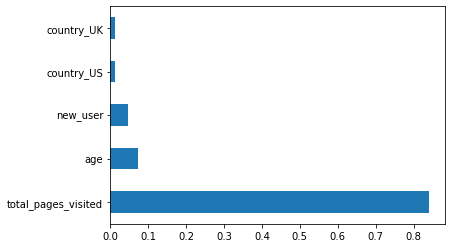

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

#### Correlation matrix with heatmap

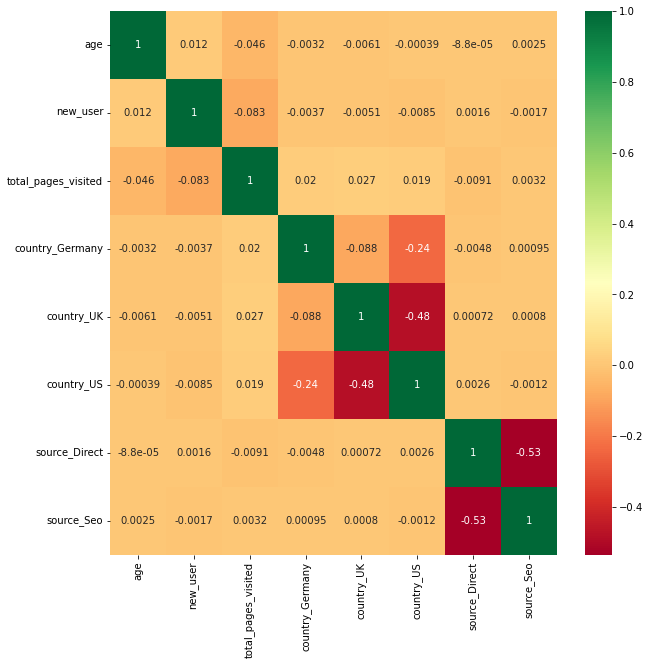

In [60]:
#get correlations of each features in dataset

corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:>

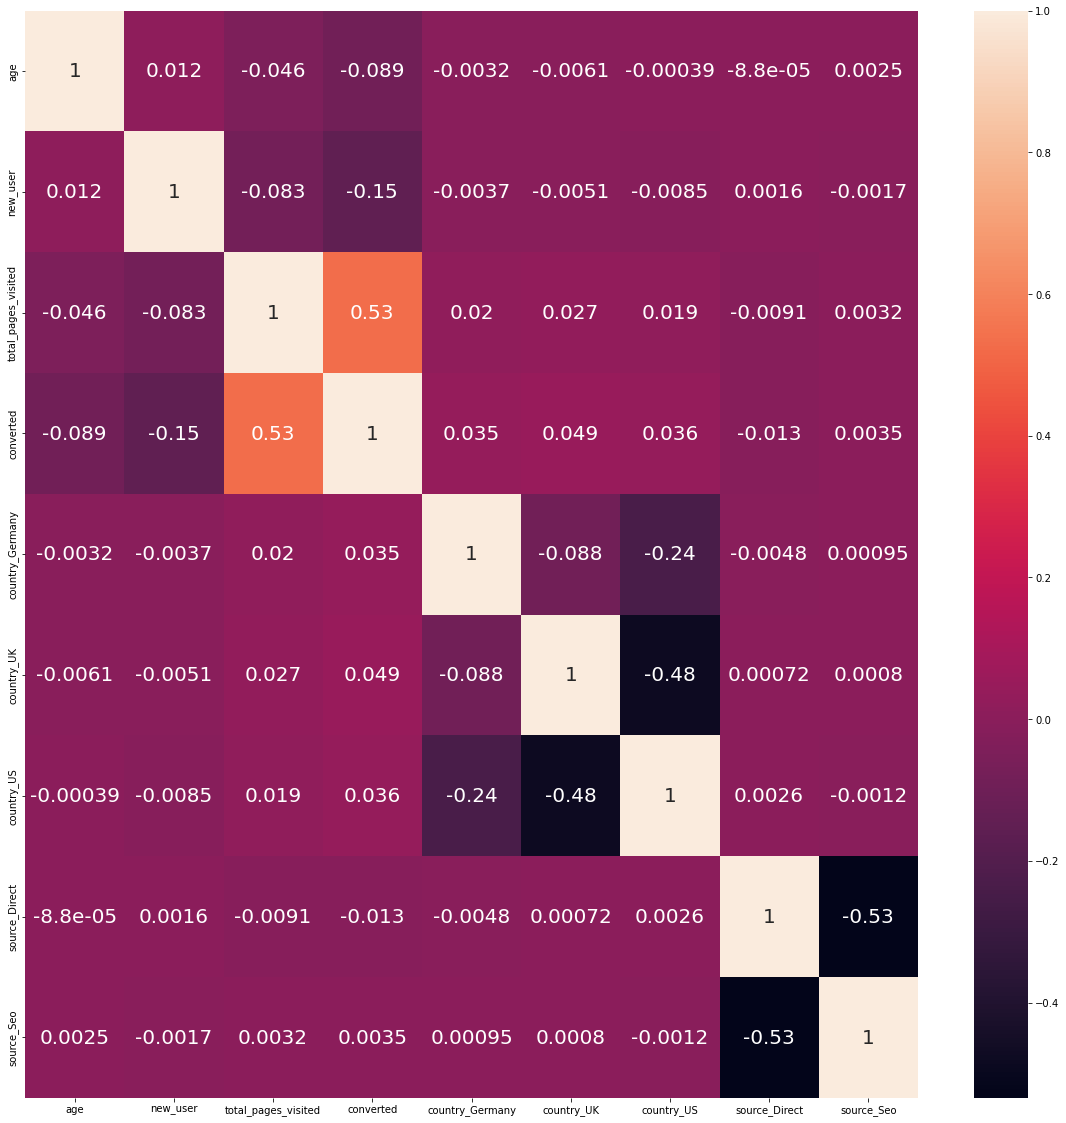

In [61]:

## Get correlation heatmap with seaborn
corr = df_new.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, annot_kws={"fontsize":20})

### Build linear regression

In [62]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, \
                                                    test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = regr.predict(X_test)

In [66]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-0.01122659 -0.01927445  0.09055003  0.00827394  0.0129018   0.01241623
 -0.00142428 -0.0004609 ]
Mean squared error: 0.02
Coefficient of determination: 0.30


In [67]:
X.head()

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,1,0,0,0
1,23,1,5,0,0,1,0,1
2,28,1,4,0,0,1,0,1
3,39,1,5,0,0,0,0,1
4,30,1,6,0,0,1,0,1


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X[['total_pages_visited']],y, \
                                                    test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.09345806]
Mean squared error: 0.02
Coefficient of determination: 0.28


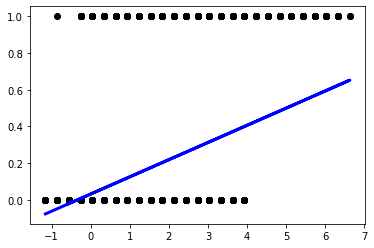

In [70]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

### Fit logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, \
                                                    test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)

In [72]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9865591397849462


### Logistic regression model accuracy is 0.986

In [74]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[60983   222]
 [  628  1407]]


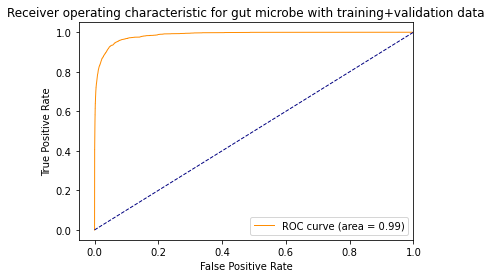

In [75]:
#define metrics
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure()
lw = roc_auc_score
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for gut microbe with training+validation data')
plt.legend(loc="lower right")
plt.show()

In [76]:
print(roc_auc_score)

0.9862874975888618


### Fit xgboost for classification

#### Notes
XGBoost is an extreme and advanced version of gradient boosting that it is more flexible 
(i.e., regularization parameters) and more efficient (i.e., parallel computation)
1. XGBoost can be used in regression, binary classification, and multi-class classification (One-vs-all). 
2. XGBoost and gradient boosting have a lot in common, including the log-odds and logistic functions

In [77]:
!pip install xgboost
import xgboost as xgb

/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, \
                                                    test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))

/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:00] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:05] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:10] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:15] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:20] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:35] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:40] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:45] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:50] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:54] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:59] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:08] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:14] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:20] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:30] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/huangz36/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:35] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
train_XG

[0.9853849255607651,
 0.9862981206366275,
 0.9863771851453601,
 0.9864562496540927,
 0.9864483432032195,
 0.9865550802900086,
 0.9866460044750512,
 0.9867250689837839,
 0.9867408818855304,
 0.9867962270416433,
 0.9869543560591086,
 0.9870492334695878,
 0.9868950576775591,
 0.9871045786257007,
 0.9871203915274472,
 0.9871401576546304,
 0.9871480641055037,
 0.987144110880067,
 0.9872548011922928,
 0.9872389882905462]

In [81]:
test_XG

[0.9854996837444655,
 0.9863851992409867,
 0.9863851992409867,
 0.9863535736875395,
 0.9864326375711575,
 0.9862745098039216,
 0.9862745098039216,
 0.9863535736875395,
 0.9863377609108159,
 0.9860373181530677,
 0.9859898798228969,
 0.986100569259962,
 0.9859424414927261,
 0.986021505376344,
 0.9860689437065149,
 0.9858791903858317,
 0.9858791903858317,
 0.9858950031625553,
 0.985831752055661,
 0.9858475648323846]

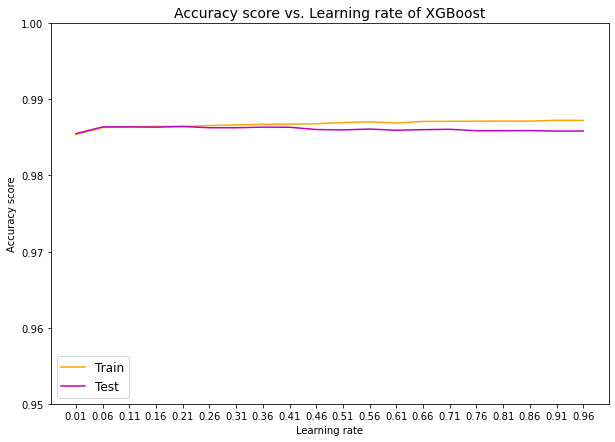

In [82]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.95, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

### Build Random Forest model, plot tree to look at the split

In [85]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, \
                                                    test_size=0.2, random_state=42)


#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [87]:
RF_score = rf.score(X_test, y_test)
print("RF_score", RF_score)

RF_score 0.9849936748893106


#### Visualize the tree plot to look at potential user segment of interest

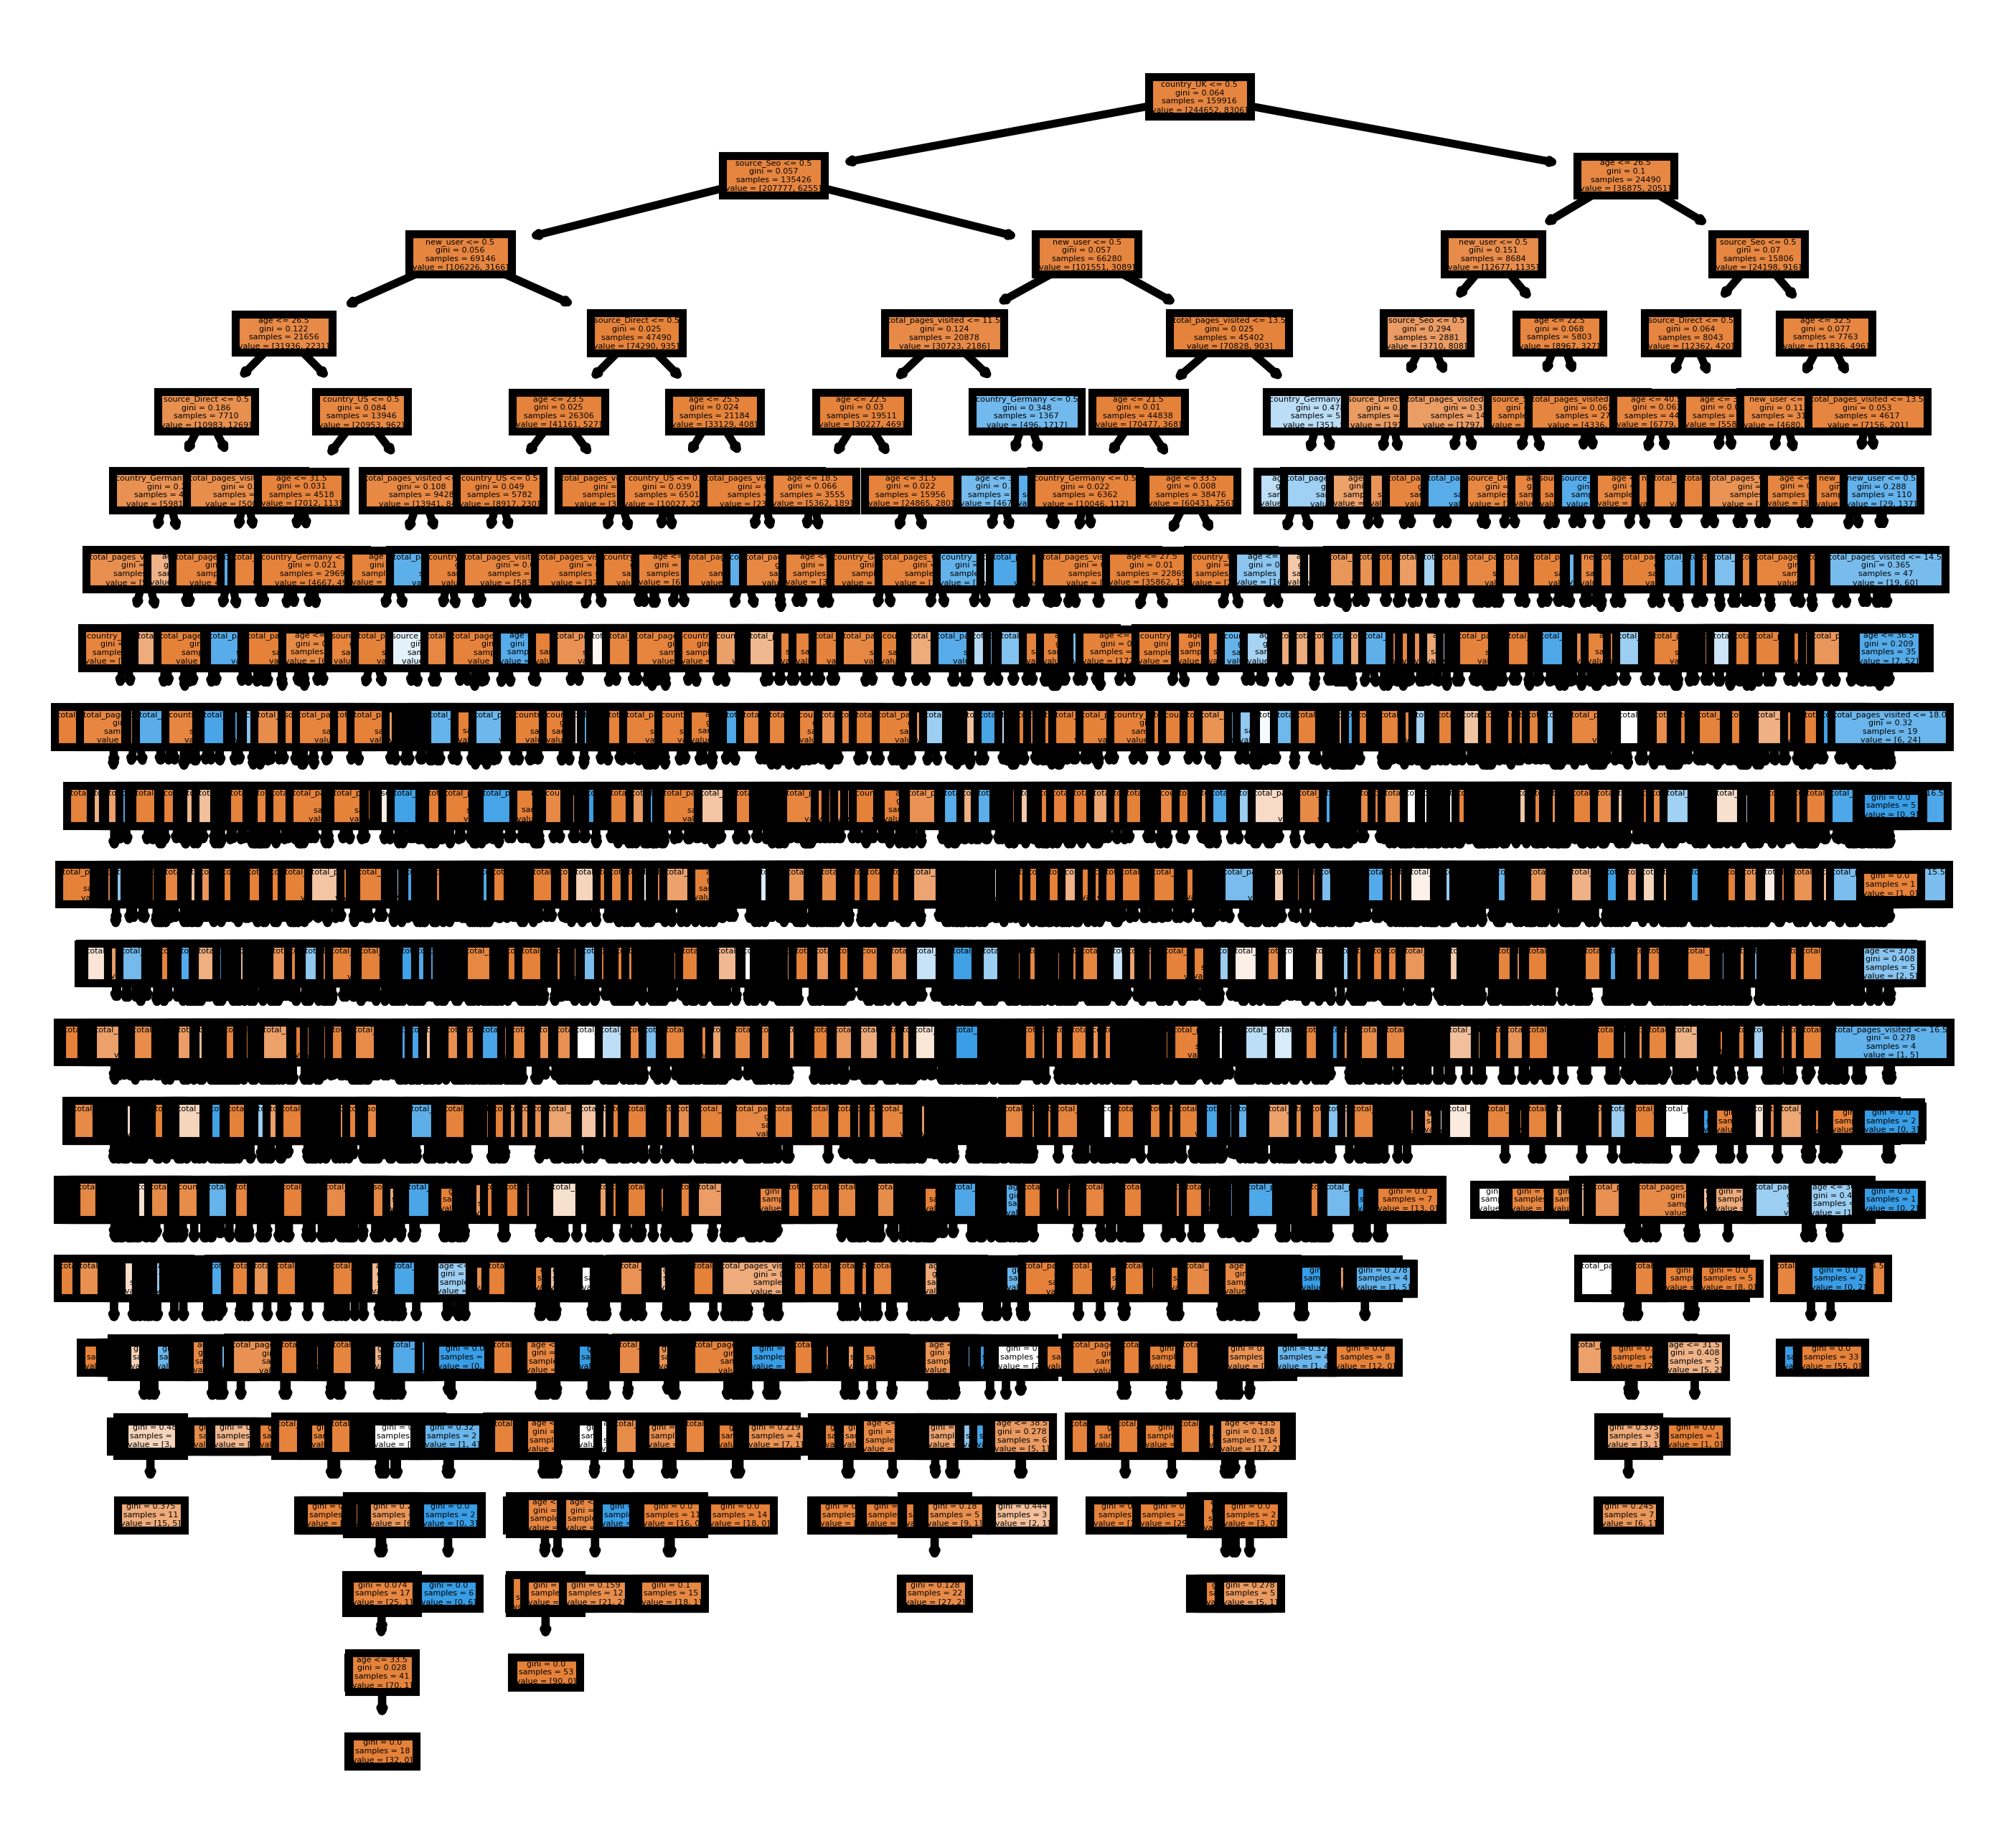

In [97]:
feature_names = X_test.columns

fn=feature_names
#cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               #class_names=cn,
               filled = True);

In [98]:
text_representation = tree.export_text(rf.estimators_[0])

In [99]:
text_representation

'|--- feature_4 <= 0.50\n|   |--- feature_7 <= 0.50\n|   |   |--- feature_1 <= 0.50\n|   |   |   |--- feature_0 <= 26.50\n|   |   |   |   |--- feature_6 <= 0.50\n|   |   |   |   |   |--- feature_3 <= 0.50\n|   |   |   |   |   |   |--- feature_2 <= 11.50\n|   |   |   |   |   |   |   |--- feature_5 <= 0.50\n|   |   |   |   |   |   |   |   |--- feature_2 <= 10.50\n|   |   |   |   |   |   |   |   |   |--- class: 0.0\n|   |   |   |   |   |   |   |   |--- feature_2 >  10.50\n|   |   |   |   |   |   |   |   |   |--- feature_0 <= 24.50\n|   |   |   |   |   |   |   |   |   |   |--- class: 0.0\n|   |   |   |   |   |   |   |   |   |--- feature_0 >  24.50\n|   |   |   |   |   |   |   |   |   |   |--- class: 0.0\n|   |   |   |   |   |   |   |--- feature_5 >  0.50\n|   |   |   |   |   |   |   |   |--- feature_2 <= 8.50\n|   |   |   |   |   |   |   |   |   |--- feature_2 <= 5.50\n|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 1.50\n|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.

## Conclusions
1. Conversion rate is lowest in China, second lowest in US, need to campaign for these geographic regions
Among all countries, the Chinese conversion rate is as low as 0.001, being an outlier compared to other countries. Check the UI and translation issue, or potential regulations on site visit blocking
2. Existing users have much higher conversion rate compared to new users. Provide more incentives (eg. promotions) to engage new users
4. Age wise, user groups 30-50 have significant decline in conversion rate. Need to inspect the product, and find out why not attractive for this age group to purchase, start marketing campaigns to this age group is necessary
3. Total_pages_visited is the strongest predictor of conversion. Need to attract users to visit more pages, spend more efforts on the site. Suggest to send notifications to existing users, remind them to come back to the side, visit more changes and lead to conversion. Incentivise ppl who already have an account to explore pages, and make their first few conversions. 